In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

### 加载数据集，查看数据信息

In [15]:
# 加载训练数据集
data = pd.read_csv(r"./data/github_dataset.csv")
data.head()

# 数据的属性
print(data.columns)

print("************************")

# 数据的总体状况（类型，缺失）
data.info()

# 检查缺失值个数
print("************************")
print(data.isnull().sum())

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
repositories     1052 non-null object
stars_count      1052 non-null int64
forks_count      1052 non-null int64
issues_count     1052 non-null int64
pull_requests    1052 non-null int64
contributors     1052 non-null int64
language         907 non-null object
dtypes: int64(5), object(2)
memory usage: 57.6+ KB
************************
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64


可以看出每项属性有1052个值，缺失的数据值的属性有一项，为language，缺失条数为 1052-907 = 145 条

In [5]:
# 获取标称属性列名
nominal_columns = ['repositories', 'language']

In [6]:
# 分析标称属性
for col in nominal_columns:
    print(f'{col}属性的取值及出现次数：\n{data[col].value_counts()}\n')

repositories属性的取值及出现次数：
aloisdeniel/dio_retry                                        2
carloscuesta/carloscuesta.me                                 2
iamshaunjp/css-grid-layouts                                  2
ritwickdey/live-server-web-extension                         2
artkirienko/final-html-css                                   2
aloisdeniel/built_vector                                     2
lengstrom/blog                                               2
iamshaunjp/django-playlist                                   2
JDevlieghere/InTeXration                                     2
iamshaunjp/flutter-animations                                2
jgthms/css-reference                                         2
KrauseFx/certs                                               2
iamshaunjp/complete-mongodb                                  2
justinshenk/fer                                              2
artkirienko/int-null-even                                    2
aloisdeniel/dart-opencage-geoco

In [7]:
# 获取数值属性列名
numerical_columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests','contributors']
# numerical_columns = ['repositories', 'stars_count', 'forks_count', 'issues_count',
#                   'pull_requests', 'contributors', 'language']

In [8]:
# 计算每个数值属性的五数概括
# five_num_summary = numerical_datas.describe()
numerical_data = data[numerical_columns]
five_num_summary = numerical_data.describe().T[['min', '25%', '50%', '75%', 'max']]
print(f'五数概括：\n{five_num_summary}')

五数概括：
               min  25%   50%    75%    max
stars_count    0.0  1.0  12.0  65.25  995.0
forks_count    0.0  1.0   6.0  38.25  973.0
issues_count   1.0  1.0   2.0   6.00  612.0
pull_requests  0.0  0.0   0.0   2.00  567.0
contributors   0.0  0.0   2.0   4.00  658.0


### 数据可视化

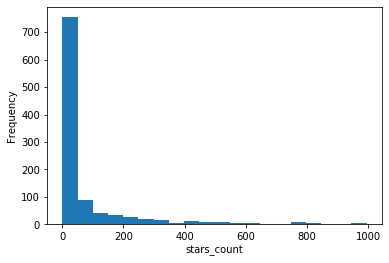

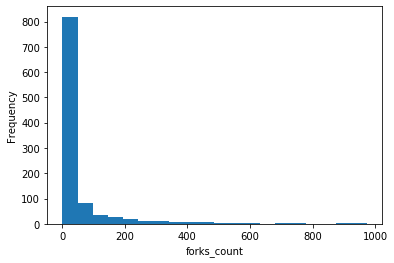

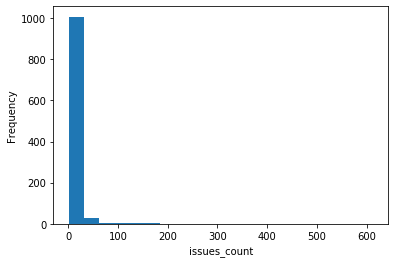

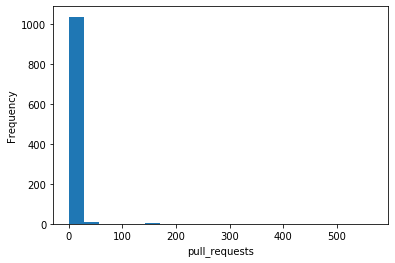

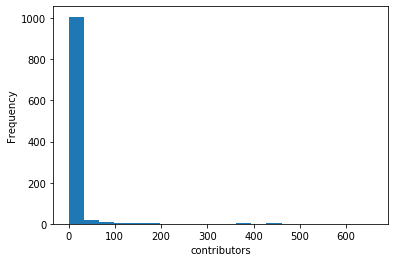

In [9]:
# 绘制直方图
for col in numerical_columns:
    plt.hist(data[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



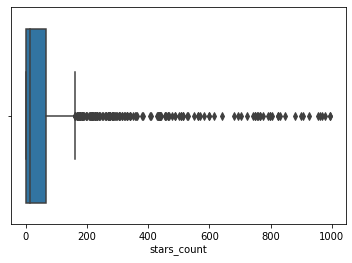

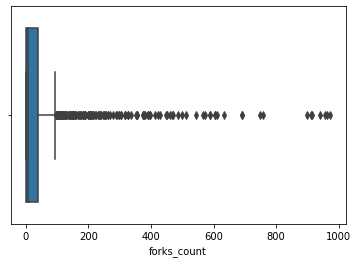

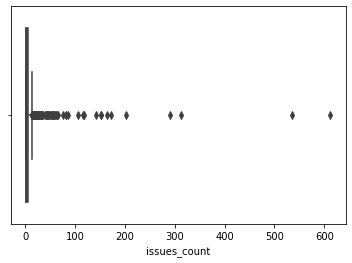

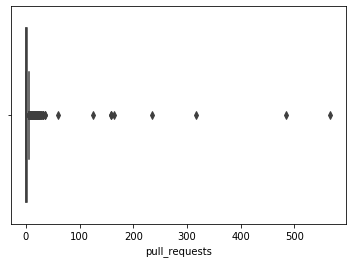

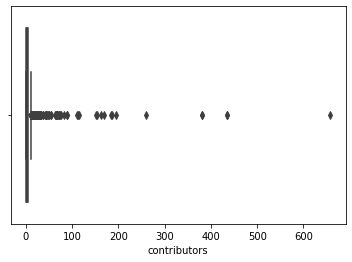

In [10]:
# 绘制盒图
for col in numerical_columns:
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.show()

### 缺失值处理

In [11]:

# 缺失部分剔除
data.dropna()

# 输出处理后的数据集信息
print('处理前数据集形状：', data.shape)
print('处理后数据集形状：', data.dropna().shape)

处理前数据集形状： (1052, 7)
处理后数据集形状： (907, 7)


In [12]:
# 用最高频率值来填补缺失值

data.fillna(data.mode().iloc[0], inplace=True)

# 再次查看缺失值情况
print(data.shape)
print(data.isnull().sum())


(1052, 7)
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64


In [32]:
# 通过属性的相关关系来填补缺失值

# 计算属性相关性
corr_matrix = data.corr()
# 输出相关性矩阵
print(corr_matrix)

data.corr()

##通过属性的相关关系来填补缺失值
target_data = data['language']
source_data = data['contributors']
flag1 = target_data.isnull().values
flag2 = source_data.isnull().values
complete_data = target_data.copy()
i=0
for _, value in target_data.iteritems():    
    if (flag1[i] == True)and(flag2[i] == False):
        complete_data[i] = 104 - source_data[i]
    i=i+1
values_clean = list(complete_data.dropna().values)


               stars_count  forks_count  issues_count  pull_requests  \
stars_count       1.000000     0.250037      0.060943      -0.004548   
forks_count       0.250037     1.000000      0.123204       0.048063   
issues_count      0.060943     0.123204      1.000000       0.324541   
pull_requests    -0.004548     0.048063      0.324541       1.000000   
contributors      0.059866     0.263042      0.382578       0.183981   

               contributors  
stars_count        0.059866  
forks_count        0.263042  
issues_count       0.382578  
pull_requests      0.183981  
contributors       1.000000  


In [37]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(pd.DataFrame(values_clean,columns=['language']))  #验证通过相关关系填补后数据是否有缺失值

,language
Total,0
Percent,0
Types,object


In [51]:
complete_data.describe()  #填补后数据的5数概况

count           1052
unique            73
top       JavaScript
freq             253
Name: language, dtype: object

从上表中可以看出，处理过后的数据没有缺失值

In [55]:
# 通过数据对象之间的相似性来填补缺失值

numeric_attr = ['language','repositories']

#查找两个对象间的相似性
def find_dis_value(dataset, pos, column, numeric_attr):
    def dis_objs(tar_obj, sou_obj):
        dis_value = 0
        count = 0
        for column in tar_obj.index:
            if tar_obj[column] != np.NaN and sou_obj[column] != np.NaN:
                if column in numeric_attr:
                        values_sort = dataset[column].dropna().values.sort()
                        denominator = values_sort[-1] - values_sort[0]
                        dis_value += abs(tar_obj[column] - sou_obj[column])/denominator
                        count += 1

                elif tar_obj[column] == sou_obj[column]:
                    dis_value += 1
                count += 1
            else:
                continue
        return dis_value/count

    mindis = 9999
    result_pos = -1
    target_obj = dataset.ix[pos]
    for index in dataset.index:
        if index == pos:
            continue
        source_obj = dataset.ix(index)
        tmp = dis_objs(target_obj, source_obj)
        if tmp < mindis:
            result_pos = index
    return result_pos

# 通过数据对象之间的相似性来填补缺失值
datas = data['language'].copy()
for index, value in datas.iteritems():
    if value == np.NaN:
        datas[index] = datas[find_dis_value(data_df, index, 'language', numeric_attr)]

In [56]:
datas.describe()  # 填补后数据的5数概况

count            907
unique            51
top       JavaScript
freq             253
Name: language, dtype: object